# Projet Groupe détection de Pompe #

## Step 1 : création du dataset ##

On a créé le dataset via le script : "Script_photoCamera.ipynb" qui nous a permis d'avoir un jeu de données assez variés avec différentes morphologies, posture hautes des pompes, et postures basses.


## Step 2 : pose détection avec Mediapipe



In [ ]:
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np


def draw_landmarks_on_image(rgb_image, detection_result):
  pose_landmarks_list = detection_result.pose_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected poses to visualize.
  for idx in range(len(pose_landmarks_list)):
    pose_landmarks = pose_landmarks_list[idx]

    # Draw the pose landmarks.
    pose_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    pose_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z) for landmark in pose_landmarks
    ])
    solutions.drawing_utils.draw_landmarks(
      annotated_image,
      pose_landmarks_proto,
      solutions.pose.POSE_CONNECTIONS,
      solutions.drawing_styles.get_default_pose_landmarks_style())
  return annotated_image




In [10]:
import matplotlib.pyplot as plt
import cv2
import numpy as np


def display_image(image, convert_bgr_to_rgb=False, title=None):
    """ Display the image using matplotlib

    Arguments:
        image (np.ndarray): the image to display
        convert_bgr_to_rgb (bool)[Optional]: Set this to True when image comes from OpenCV imread
        title (str)[Optional]: Title displayed above the image
    """
    # conversion from BGR to RGB if needed
    if convert_bgr_to_rgb:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    plt.imshow(image,interpolation='nearest')
    plt.axis('on') 
    
    if title is not None:
        plt.title(title)
        
    plt.show()    

    

    
def image_info(image):
    """ Display basic information about an image
    
    Arguments:
        image (np.ndarray): the image to analyze
    """
    print('Image type:', type(image))
    print('Image data type:', image.dtype)
    print('Image shape:', image.shape)
    print('Min value:', image.min())
    # returns the smallest pixel value across all pixels in the image
    #For color images (e.g., RGB), the function operates on the entire array, returning a single minimum value across all channels and all pixels.
    print('Max value:', image.max()) 
    #  returns the maximum pixel intensity value across all dimensions of the image, including width, height, and color channels
    

In [18]:
import cv2
import numpy as np
import mediapipe as mp

BaseOptions = mp.tasks.BaseOptions
PoseLandmarker = mp.tasks.vision.PoseLandmarker
PoseLandmarkerOptions = mp.tasks.vision.PoseLandmarkerOptions
RunningMode = mp.tasks.vision.RunningMode

MODEL_PATH = "pose_landmarker_full.task"

In [31]:

import cv2      
example_haut = cv2.imread('../Dataset_pompe/haut/captured_41.png')


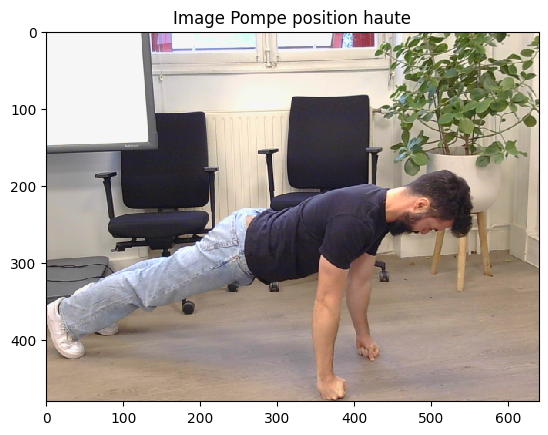

In [ ]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import visiondisplay_image(example_haut, convert_bgr_to_rgb=True, title='Image Pompe position haute')

In [24]:
image_info(example_haut)

Image type: <class 'numpy.ndarray'>
Image data type: uint8
Image shape: (480, 640, 3)
Min value: 0
Max value: 255


In [21]:
import os
print(os.getcwd())
print(os.path.exists("pose_landmarker_full.task"))


c:\Users\mvana\Documents\Formation data scientist\20. ACV\partie_2
True


In [25]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an PoseLandmarker object.
base_options = python.BaseOptions(model_asset_path='pose_landmarker_lite.task')
options = vision.PoseLandmarkerOptions(
    base_options=base_options,
    output_segmentation_masks=True)
detector = vision.PoseLandmarker.create_from_options(options)

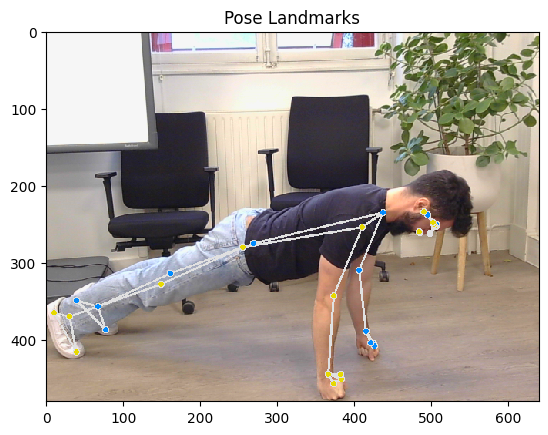

In [ ]:
mp_image = mp.Image.create_from_file("../Dataset_pompe/haut/captured_41.png")
result = detector.detect(mp_image)
result.pose_landmarks


# STEP 3: Load the input image.
image = mp.Image.create_from_file("../Dataset_pompe/haut/captured_41.png")

# STEP 4: Detect pose landmarks from the input image.
detection_result = detector.detect(image)

# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
display_image(annotated_image, title='Pose Landmarks')

In [ ]:
segmentation_mask = detection_result.segmentation_masks[0].numpy_view()
visualized_mask = np.repeat(segmentation_mask[:, :, np.newaxis], 3, axis=2) * 255
display_image(visualized_mask.astype(np.uint8), title='Segmentation Mask')

In [45]:
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
from mediapipe.python.solutions.pose import PoseLandmark

img = image.numpy_view()
h, w = img.shape[:2]
lms = detection_result.pose_landmarks[0]

for pl in PoseLandmark:
    i = pl.value
    lm = lms[i]
    print(f"{pl.name:20s}  x={lm.x:.4f} y={lm.y:.4f}  ->  ({int(lm.x*w)}, {int(lm.y*h)})  vis={lm.visibility:.3f}")


NOSE                  x=0.7785 y=0.5469  ->  (498, 262)  vis=1.000
LEFT_EYE_INNER        x=0.7910 y=0.5278  ->  (506, 253)  vis=1.000
LEFT_EYE              x=0.7909 y=0.5247  ->  (506, 251)  vis=1.000
LEFT_EYE_OUTER        x=0.7907 y=0.5224  ->  (506, 250)  vis=1.000
RIGHT_EYE_INNER       x=0.7887 y=0.5263  ->  (504, 252)  vis=1.000
RIGHT_EYE             x=0.7874 y=0.5221  ->  (503, 250)  vis=1.000
RIGHT_EYE_OUTER       x=0.7859 y=0.5184  ->  (502, 248)  vis=1.000
LEFT_EAR              x=0.7745 y=0.4959  ->  (495, 238)  vis=1.000
RIGHT_EAR             x=0.7671 y=0.4891  ->  (490, 234)  vis=1.000
MOUTH_LEFT            x=0.7593 y=0.5440  ->  (485, 261)  vis=1.000
MOUTH_RIGHT           x=0.7563 y=0.5426  ->  (484, 260)  vis=1.000
LEFT_SHOULDER         x=0.6830 y=0.4912  ->  (437, 235)  vis=1.000
RIGHT_SHOULDER        x=0.6409 y=0.5311  ->  (410, 254)  vis=1.000
LEFT_ELBOW            x=0.6349 y=0.6476  ->  (406, 310)  vis=0.624
RIGHT_ELBOW           x=0.5832 y=0.7148  ->  (373, 343)  vis=0